In [1]:
!pip install --upgrade fastai

    100% |████████████████████████████████| 235kB 11.4MB/s 
Requirement not upgraded as not directly required: dataclasses; python_version < "3.7" in /usr/local/lib/python3.6/site-packages (from fastai) (0.6)
Requirement not upgraded as not directly required: numpy>=1.15 in /usr/local/lib/python3.6/site-packages (from fastai) (1.15.4)
Requirement not upgraded as not directly required: Pillow in /usr/local/lib/python3.6/site-packages (from fastai) (5.4.0)
Requirement not upgraded as not directly required: requests in /usr/local/lib/python3.6/site-packages (from fastai) (2.21.0)
Requirement not upgraded as not directly required: nvidia-ml-py3 in /usr/local/lib/python3.6/site-packages (from fastai) (7.352.0)
Requirement not upgraded as not directly required: bottleneck in /usr/local/lib/python3.6/site-packages (from fastai) (1.2.1)
Requirement not upgraded as not directly required: scipy in /usr/local/lib/python3.6/site-packages (from fastai) (1.2.0)
Requirement not upgraded as not direct

In [2]:
!pip install --upgrade torch torchvision

    100% |████████████████████████████████| 676.9MB 58kB/s 
    100% |████████████████████████████████| 2.6MB 11.3MB/s 
Requirement not upgraded as not directly required: numpy in /usr/local/lib/python3.6/site-packages (from torch) (1.15.4)
Requirement not upgraded as not directly required: pillow>=4.1.1 in /usr/local/lib/python3.6/site-packages (from torchvision) (5.4.0)
Requirement not upgraded as not directly required: six in /usr/local/lib/python3.6/site-packages (from torchvision) (1.12.0)
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 3.0.2 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.4.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.2.0 which is incompatible.
  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post2
  Found existing installation: torchvision 0.2.1
    Uninstalling

In [7]:
!pip install pretrainedmodels

    100% |████████████████████████████████| 61kB 4.8MB/s 
  Running setup.py bdist_wheel for pretrainedmodels ... done
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pretrainedmodels munch
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 3.0.2 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.4.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os

os.chdir(os.pardir)

%reload_ext autoreload
%autoreload 2

In [3]:
from src.dataloaders.data_loader import DataLoader
from src.trainers.trainer import Trainer
from src.evaluators.evaluator import Evaluator

# Hyperparameters

In [4]:
EXP_NAME = 'pnasnet5'

BATCH_SIZE = 32

N_EPOCHS_1 = 30
LR_1 = 1e-2

N_EPOCHS_2 = 20
LR_2 = slice(1e-5, 1e-3)

# Import Model

In [5]:
from src.models.pnasnet5_large import PNASNet5Large

In [6]:
model = PNASNet5Large()

In [7]:
model_config = model.get_model_config()
img_stats = model.get_img_stats()
img_size = model.get_img_size()

# Load Data

In [9]:
data_loader = DataLoader()
data_bunch = data_loader.get_data_bunch(img_size=img_size, img_stats=img_stats, batch_size=BATCH_SIZE)

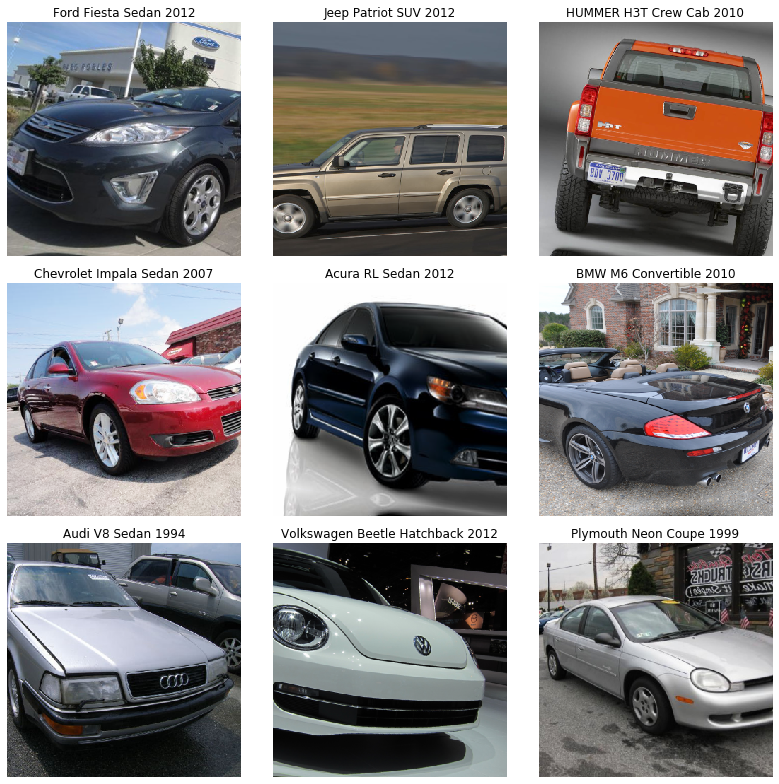

In [12]:
data_bunch.show_batch(rows=3, figsize=(11,11))

# Begin Training

In [12]:
trainer = Trainer(
    data_bunch=data_bunch, 
    mixup=True, 
    exp_name=EXP_NAME,
    **model_config)

## Stage-1: Transfer Learning

Only train the classifier head first.

In [13]:
import torch
torch.cuda.empty_cache()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-05
Min loss divided by 10: 6.31E-08


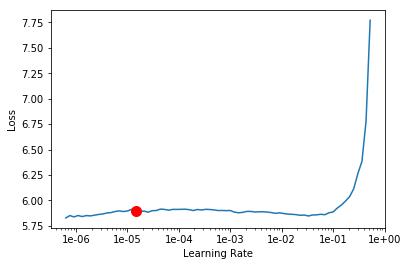

In [7]:
trainer.lr_find(freeze=True)

In [8]:
trainer.train(n_epochs=N_EPOCHS_1, max_lr=LR_1, freeze=True, name='1_30e')

epoch,train_loss,valid_loss,accuracy,time
0,5.665275,5.105371,0.029466,02:59
1,5.173791,4.545937,0.089626,02:56
2,4.736320,3.942525,0.144874,02:57
3,4.337118,3.493411,0.197053,02:56
4,3.989284,3.024723,0.296501,02:56
5,3.741817,2.810789,0.325967,02:56
6,3.506308,2.583171,0.389810,02:56
7,3.293650,2.588763,0.361572,02:56
8,3.196037,2.538305,0.405770,02:56
9,3.071708,2.411699,0.446900,02:56


Better model found at epoch 0 with valid_loss value: 5.105370998382568.
Better model found at epoch 1 with valid_loss value: 4.545936584472656.
Better model found at epoch 2 with valid_loss value: 3.9425249099731445.
Better model found at epoch 3 with valid_loss value: 3.493411064147949.
Better model found at epoch 4 with valid_loss value: 3.0247232913970947.
Better model found at epoch 5 with valid_loss value: 2.810789108276367.
Better model found at epoch 6 with valid_loss value: 2.5831711292266846.
Better model found at epoch 8 with valid_loss value: 2.538304567337036.
Better model found at epoch 9 with valid_loss value: 2.411698818206787.
Better model found at epoch 10 with valid_loss value: 2.132432460784912.
Better model found at epoch 13 with valid_loss value: 1.9729000329971313.
Better model found at epoch 14 with valid_loss value: 1.7306050062179565.
Better model found at epoch 15 with valid_loss value: 1.6073349714279175.
Better model found at epoch 16 with valid_loss value: 

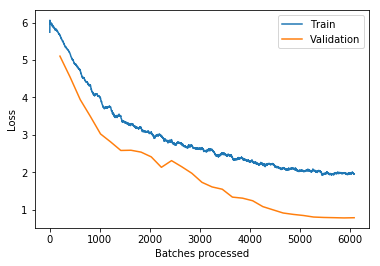

In [9]:
trainer.plot_losses()

## Stage-2: Fine-tuning

Unfreeze all layers and train with discriminative layer training.

In [ ]:
trainer.load_weights('1_30e')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


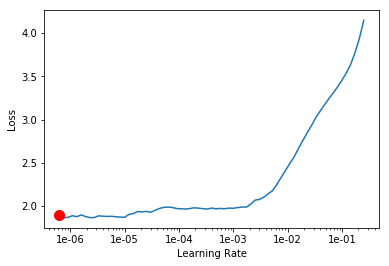

In [10]:
trainer.lr_find(freeze=False)

In [11]:
trainer.train(n_epochs=N_EPOCHS_2, max_lr=LR_2, freeze=False, name='2_20e')

epoch,train_loss,valid_loss,accuracy,time
0,1.973704,0.776563,0.804174,03:42
1,1.919300,0.756799,0.804788,03:42
2,2.018211,0.757046,0.804174,03:42
3,1.945039,0.759702,0.790055,03:43
4,1.972958,0.770068,0.810313,03:41
5,1.921289,0.740715,0.806016,03:41
6,1.892536,0.706582,0.820135,03:42
7,1.841538,0.676440,0.818293,03:41
8,1.830145,0.655590,0.832413,03:42
9,1.778976,0.648005,0.833640,03:42


Better model found at epoch 0 with valid_loss value: 0.7765632271766663.
Better model found at epoch 1 with valid_loss value: 0.7567988634109497.
Better model found at epoch 5 with valid_loss value: 0.7407153844833374.
Better model found at epoch 6 with valid_loss value: 0.7065816521644592.
Better model found at epoch 7 with valid_loss value: 0.6764402389526367.
Better model found at epoch 8 with valid_loss value: 0.655589759349823.
Better model found at epoch 9 with valid_loss value: 0.6480045318603516.
Better model found at epoch 10 with valid_loss value: 0.6406291723251343.
Better model found at epoch 11 with valid_loss value: 0.6177262663841248.
Better model found at epoch 12 with valid_loss value: 0.6101557016372681.
Better model found at epoch 13 with valid_loss value: 0.5950613021850586.
Better model found at epoch 15 with valid_loss value: 0.5802004933357239.
Better model found at epoch 16 with valid_loss value: 0.576372504234314.
Better model found at epoch 17 with valid_loss 

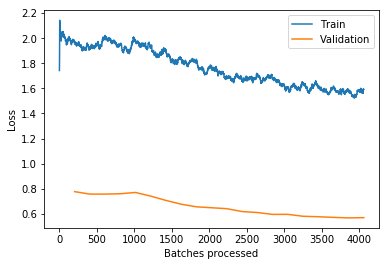

In [12]:
trainer.plot_losses()

## Export Learner/Model

In [13]:
trainer.export()

# Evaluation

In [22]:
interp = ClassificationInterpretation.from_learner(trainer.learn)

NameError: name 'ClassificationInterpretation' is not defined

In [ ]:
most_confused = interp.most_confused()

In [ ]:
most_confused

In [14]:
evaluator = Evaluator(
    learn_name=EXP_NAME,
    tta=False,
    exp_name=EXP_NAME
)

In [ ]:
evaluator = Evaluator(
    learn_name=EXP_NAME,
    tta=True,
    exp_name=(EXP_NAME + '_tta')
)

In [15]:
evaluator.get_metrics()

(0.8490237532645193,
 0.8490237532645193,
 0.8490237532645193,
 0.8490237532645193)